# Polinômio Interpolador de Lagrange

In [5]:
import numpy as np

In [6]:
def lagrange(x: list, y: list) -> list:
    # a lista coeffs contém y_i / denom_i
    # onde denom_i é o denominador de L_i
    n = len(x)
    coeffs = []
    for i in range(n):
        denom_i = np.prod([x[i] - x[j] for j in range(n) if j != i])
        coeffs.append(y[i] / denom_i)
    return coeffs

In [23]:
def build_poly(x, coeffs):
    n = len(x)
    def poly(t):
        comb = 0
        for i in range(n):
            numer = 1
            for j in range(n):
                if j != i:
                    numer *= (t - x[j])
            numer *= coeffs[i]
            comb += numer
        return comb
    return poly

## Exemplo 1

In [20]:
x = [0, 2, 4]
y = [2, 1, 2]
coeffs = lagrange(x, y)

In [24]:
p = build_poly(x, coeffs)

In [25]:
p(0), p(2), p(4)

(2.0, 1.0, 2.0)

## Exemplo 2

In [31]:
n = 10
# valores de x em [a,b] random
a, b = -2, 2
x = a + (b - a) * np.random.random(n)
x.sort()
# valores de y em [c, d] random
c, d = 2, 10
n = 10
y = c + (d - a) * np.random.random(n)
coeffs2 = lagrange(x, y)
p2 = build_poly(x, coeffs2)

## Visualização

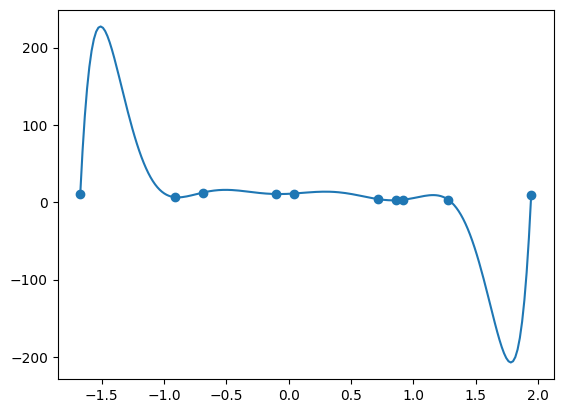

In [32]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
# gráfico do polinômio
t = np.linspace(min(x), max(x), 200)
pt = [p2(ti) for ti in t]
plt.plot(t, pt)